In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import skimage
from skimage.morphology import extrema
import cv2

In [2]:
def ShowImage(title,img,ctype):
  plt.figure()

  if ctype=='bgr':
    b,g,r = cv2.split(img)           # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
    
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
    
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
    
  elif ctype=='rgb':
    plt.imshow(img)

  else:
    raise Exception("Unknown colour type")
    
  plt.axis('off')
  plt.title(title)
  plt.show()

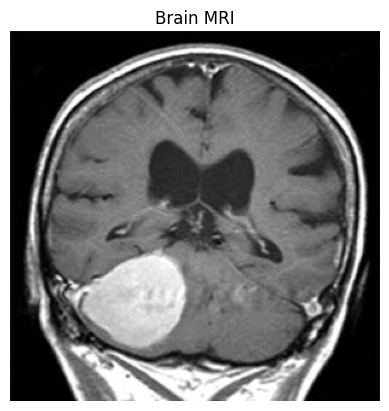

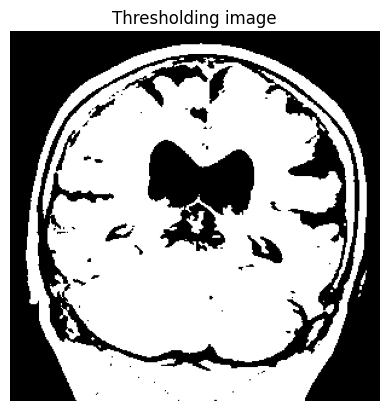

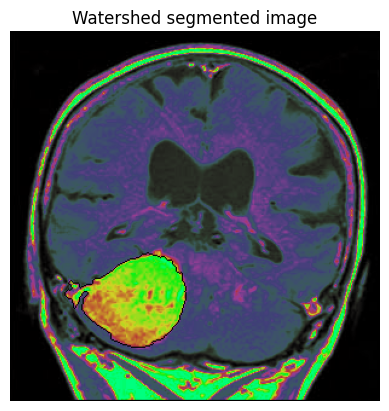

In [6]:
img = cv2.imread('image(14).jpg')


# ***********************Input Image****************************
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI',gray,'gray')



# ********************Thresholding Segmentation*****************
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')



# ********************Watershed Segmentation********************


kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# Finding sure background area
sure_bg = cv2.dilate(thresh,kernel,iterations=3)
    
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
   
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
     
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

     
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')



